# Pytoch Log Neuron

## Init

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

## Define Neuron function

In [2]:
class LogNeuron(nn.Module):
    def __init__(self):
        # Call constructor of parent
        super().__init__()
        # weight and bias
        self.weight = nn.Parameter(torch.rand(1) + 0.5)
        self.bias = nn.Parameter(torch.rand(1) + 0.5)

    def forward(self, x):
        return torch.log(self.weight * x + self.bias)

## Init Neuron and test values

In [3]:
# define training values
x = torch.tensor([0.001, 0.01, 1.0, 2.0, 3.0, 4.0])
# print(x)
# output = neuron(x)
# print(output)
# output = tensor([0.6931, 1.0986, 1.3863], grad_fn=<LogBackward0>)
# grad_fn=<LogBackward0>) reference to how my values were computed, so it knows which components are involved?

## Trrrrrraining!!

In [4]:
# Target outputs (e.g., log(x + 1)) links through output to our initial x variables set?
y_target = torch.log(x + 1)

# Create instance of LogNeuron. Basically my Neuron in a single variable?
neuron = LogNeuron()
# Loss function and optimizer
# Equal to the loss variable in the manual neuron? Criterion->conventional name of how well our modle performs
criterion = nn.MSELoss()
# Calculated the effective adjustment to our weight and bias. lr=learning rate
optimizer = optim.SGD(neuron.parameters(), lr=0.01)

# log training history
epochs = 10000
outputs_history = torch.zeros((epochs, len(x)))

# Training loop
for i in range(epochs):
    optimizer.zero_grad()
    output = neuron(x)
    outputs_history[i, :] = output
    # Calls the defined criterion and calculates the loss based on prediction(output) and fact(y_target)
    loss = criterion(output, y_target)
    # computes the gradients for all trainable parameters
    loss.backward()
    # uses calculated gradients to adjust my weight and bias
    optimizer.step()

print("Trained weight:", neuron.weight.item())
print("Trained bias:", neuron.bias.item())

Trained weight: 1.0000128746032715
Trained bias: 0.9999920129776001


 ## Visualize the Neuron

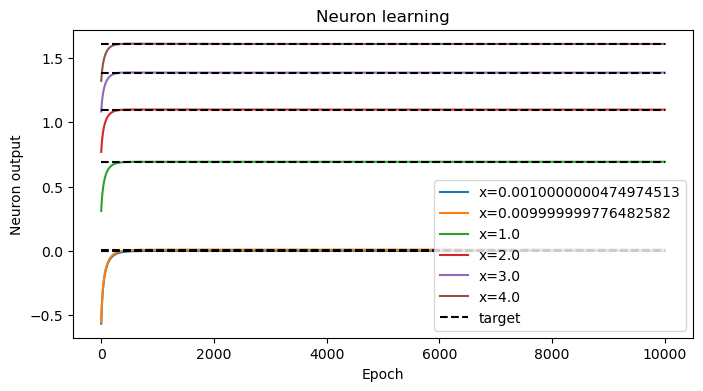

In [5]:
outputs_history_np = outputs_history.detach().numpy()

plt.figure(figsize=(8,4))
for i in range(outputs_history_np.shape[1]):  # iterate over each input
    plt.plot(outputs_history_np[:, i], label=f'x={x[i].item()}')

plt.hlines(y_target.numpy(), 0, outputs_history_np.shape[0]-1,
           colors='k', linestyles='dashed', label='target')
plt.xlabel('Epoch')
plt.ylabel('Neuron output')
plt.title('Neuron learning')
plt.legend()
plt.show()

## Check deviation

In [6]:
# Test inputs
x_test = torch.tensor([0.01, 0.5, 1.5, 2.5, 4.0, 5.0, 200])
# True target outputs for comparison
y_true = torch.log(x_test + 1)
# Let Neuron calulcate values
y_pred = neuron(x_test)

# Print comparison with deviation and percentsage error
print("x\tNeuron output\tTarget output\tDeviation\t% Error")
for xi, yp, yt in zip(x_test, y_pred, y_true):
    deviation = yp - yt
    percent_error = abs(deviation / yt) * 100
    print(f"{xi.item():.2f}\t{yp.item():.4f}\t\t{yt.item():.4f}\t\t{deviation.item():.4f}\t\t{percent_error.item():.2f}%")


x	Neuron output	Target output	Deviation	% Error
0.01	0.0099		0.0100		-0.0000		0.08%
0.50	0.4055		0.4055		-0.0000		0.00%
1.50	0.9163		0.9163		0.0000		0.00%
2.50	1.2528		1.2528		0.0000		0.00%
4.00	1.6094		1.6094		0.0000		0.00%
5.00	1.7918		1.7918		0.0000		0.00%
200.00	5.3033		5.3033		0.0000		0.00%
